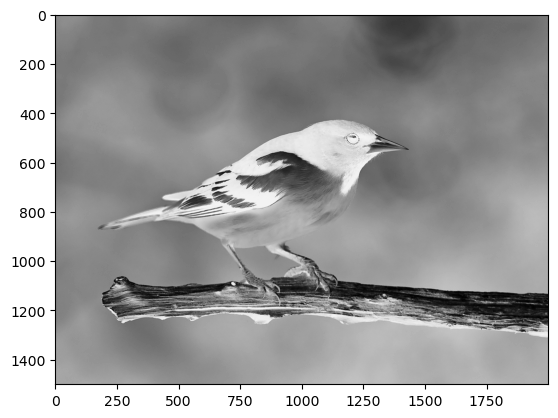

In [17]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img_original = Image.open('bird.png')
img = img_original.convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# inversion operation
im_2 = 255 - im_1

# convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)


img.show()
new_img.show()
plt.imshow(new_img, cmap='gray')
plt.show()

C:\Users\US\AppData\Local\Temp\ipykernel_15492\3472901008.py:27: RuntimeWarning: divide by zero encountered in log
  b3 = np.log(b3) * gamma


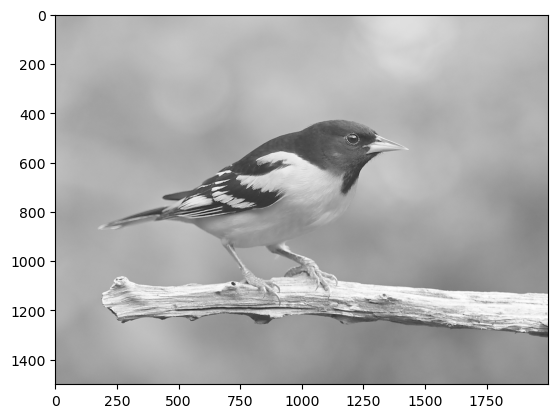

In [15]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# init gamma
gamma = 0.5

# convert ndarray from int to float
b1 = im_1.astype(float)

# find maximum value in b1
b2 = np.max(b1)

# b3 is normalized
b3 = b1 / b2

# gamma correction exponent is computed
b3 = np.log(b3) * gamma

# gamma correction is computed
c = np.exp(b3) * 255.0

# c1 is converted to type int
c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()


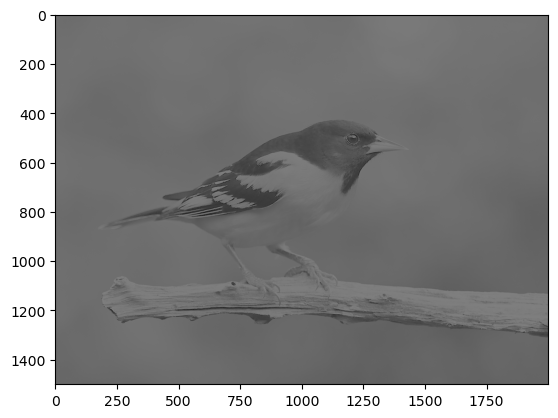

In [19]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# convert ndarray from int to float
b1 = im_1.astype(float)

# find maximum value in b1
b2 = np.max(b1)

# performing the log transformation
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)

# c1 is converted to type int
c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()


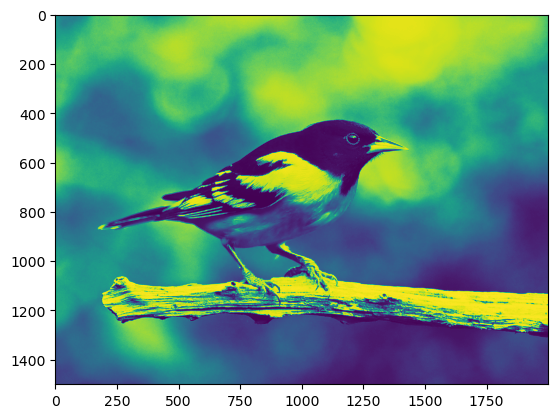

In [20]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# convert 2D ndarray from 1D array
im1 = im1.flatten()

# histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

# cumulative distribution function is computed
cdf = hist.cumsum()

# places where cdf is masked or ignored and rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

# histogram equalization is performed
num_cdf = (cdf_m - cdf_m.min()) * 255
den_cdf = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf / den_cdf

# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# cdf values are assigned in the flattened array
im2 = cdf[im1]

# using reshape command to make it into 2D
im3 = np.reshape(im2, img.size[::-1])

# converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.show()


255 0


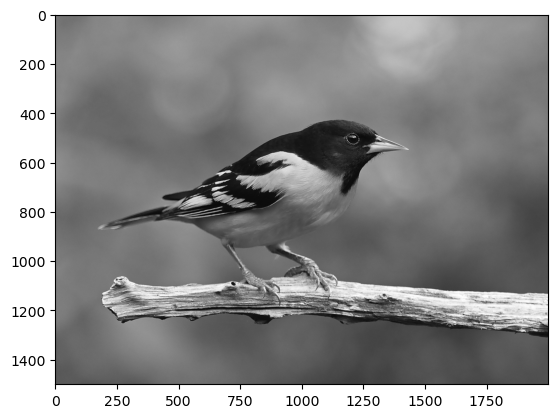

In [22]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# finding the maximum and minimum pixel values
a = im1.max()
b = im1.min()
print(a, b)

# converting im1 to float
c = im1.astype(float)

# contrast stretching transformation
im2 = 255 * (c - b) / (a - b)

# im2 is converted from ndarray to image
im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3)
plt.show()


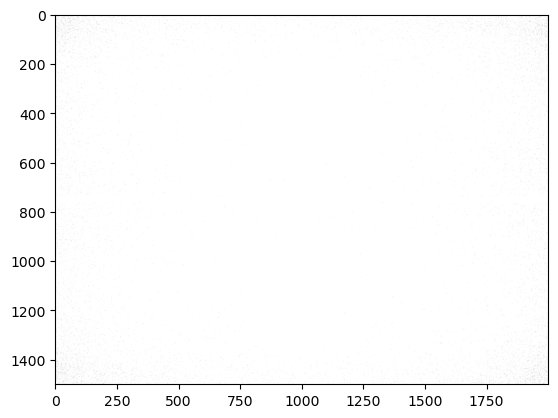

In [23]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

d = d.astype(float)

# im2 is converted from ndarray to image
im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

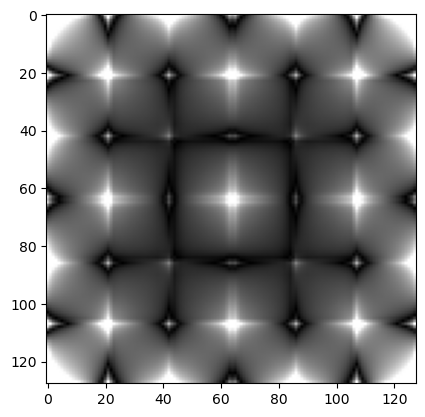

In [30]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('images.png').convert('L')

# convert image into ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

# d is defined and values in H are initialized to 1
center1 = M / 2
center2 = N / 2

# D0 is the cut-off radius
# n is the order of BLPF (Butterworth Lowpass Filter)
D0 = 50
n = 2 * 1

# defining the convolution function for BLPF
for i in range(0, M):
    for j in range(0, N):
        # Euclidean distance from origin is computed
        d1 = math.sqrt((i - center1)**2 + (j - center2)**2)
        if d1 == 0:
            H[i, j] = 1
        else:
            H[i, j] = 1 / (1 + (d1 / D0)**n)

# convolution is performed
e = d * H

# computing the magnitude of the inverse FFT
con = abs(scipy.fftpack.ifft2(e))

# im2 is converted from ndarray to image
im3 = Image.fromarray(con.astype(float))

img.show()
im3.show()
plt.imshow(im3)
plt.show()

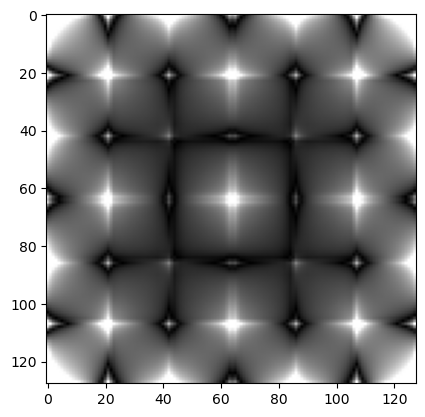

In [29]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('images.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))  # initialize H to all ones

center1 = M / 2
center2 = N / 2

# D0 is the cut-off radius
# n is the order of BLPF (Butterworth Lowpass Filter)
d0 = 50
n = 2 * 1

# d0_cut defines cut-off radius to eliminate high frequency
d0_cut = 100

# defining the convolution function for BLPF
for i in range(0, M):
    for j in range(0, N):
        # Euclidean distance from origin is computed
        d1 = math.sqrt((i - center1)**2 + (j - center2)**2)
        if d1 < d0_cut:
            H[i, j] = 1 / (1 + ((d1 / d0)**n))

# H is assigned to e
e = H * d

# converting H * d from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

# performing the convolution (inverse FFT)
con = H * d
f = abs(scipy.fftpack.ifft2(con))

# im2 is converted from ndarray to image
im3 = Image.fromarray(f.astype(float))

img.show()
im3.show()
plt.imshow(im3)
plt.show()
